## Data Prep

In [1]:
# !pip3 install pygithub
# !source ../app/bin/activate.fish

from githubapi import GithubAPI
from collections import namedtuple
from collections import Counter
from itertools import groupby
import matplotlib.pyplot as plt
import operator
import re


import pandas as pd
import seaborn as sns

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')

from dotenv import load_dotenv   #for python-dotenv method
load_dotenv()                    #for python-dotenv method

import os 

gh = GithubAPI()

test_object = next(gh.session.cache.values()).json()
test_object

/var/folders/7y/km239y1n2w718p09d_ljlxhm0000gn/T/ipykernel_60446/2834349477.py:17: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg', 'pdf')


[
    {
        'sha': '111af4ebae8efd1b3b52ff1518d9769261e92936',
        'node_id': 'C_kwDOJPhyCtoAKDExMWFmNGViYWU4ZWZkMWIzYjUyZmYxNTE4ZDk3NjkyNjFlOTI5MzY',
        'commit': {
            'author': {
                'name': 'Dominik Böhler',
                'email': '289612+dominikb1888@users.noreply.github.com',
                'date': '2022-02-03T15:40:35Z'
            },
            'committer': {
                'name': 'Dominik Böhler',
                'email': '289612+dominikb1888@users.noreply.github.com',
                'date': '2022-02-03T15:40:35Z'
            },
            'message': 'initial',
            'tree': {
                'sha': '05ec9a771c1a7e174b1df2d82946ff71ab2c9374',
                'url': 'https://api.github.com/repos/DB-Student-Repos/11-01_word-search-ceb434/git/trees/05ec9a771c1a7e174b1df2d82946ff71ab2c9374'
            },
            'url': 'https://api.github.com/repos/DB-Student-Repos/11-01_word-search-ceb434/git/commits/111af4ebae8efd1b3b52ff1518d9769261e92936',
            'comment_count': 0,
            'verification': {
                'verified': False,
                'reason': 'unsigned',
                'signature': None,
                'payload': None
            }
        },
        'url': 'https://api.github.com/repos/DB-Student-Repos/11-01_word-search-ceb434/commits/111af4ebae8efd1b3b52ff1518d9769261e92936',
        'html_url': 'https://github.com/DB-Student-Repos/11-01_word-search-ceb434/commit/111af4ebae8efd1b3b52ff1518d9769261e92936',
        'comments_url': 'https://api.github.com/repos/DB-Student-Repos/11-01_word-search-ceb434/commits/111af4ebae8efd1b3b52ff1518d9769261e92936/comments',
        'author': {
            'login': 'dominikb1888',
            'id': 289612,
            'node_id': 'MDQ6VXNlcjI4OTYxMg==',
            'avatar_url': 'https://avatars.githubusercontent.com/u/289612?v=4',
            'gravatar_id': '',
            'url': 'https://api.github.com/users/dominikb1888',
            'html_url': 'https://github.com/dominikb1888',
            'followers_url': 'https://api.github.com/users/dominikb1888/followers',
            'following_url': 'https://api.github.com/users/dominikb1888/following{/other_user}',
            'gists_url': 'https://api.github.com/users/dominikb1888/gists{/gist_id}',
            'starred_url': 'https://api.github.com/users/dominikb1888/starred{/owner}{/repo}',
            'subscriptions_url': 'https://api.github.com/users/dominikb1888/subscriptions',
            'organizations_url': 'https://api.github.com/users/dominikb1888/orgs',
            'repos_url': 'https://api.github.com/users/dominikb1888/repos',
            'events_url': 'https://api.github.com/users/dominikb1888/events{/privacy}',
            'received_events_url': 'https://api.github.com/users/dominikb1888/received_events',
            'type': 'User',
            'site_admin': False
        },
        'committer': {
            'login': 'dominikb1888',
            'id': 289612,
            'node_id': 'MDQ6VXNlcjI4OTYxMg==',
            'avatar_url': 'https://avatars.githubusercontent.com/u/289612?v=4',
            'gravatar_id': '',
            'url': 'https://api.github.com/users/dominikb1888',
            'html_url': 'https://github.com/dominikb1888',
            'followers_url': 'https://api.github.com/users/dominikb1888/followers',
            'following_url': 'https://api.github.com/users/dominikb1888/following{/other_user}',
            'gists_url': 'https://api.github.com/users/dominikb1888/gists{/gist_id}',
            'starred_url': 'https://api.github.com/users/dominikb1888/starred{/owner}{/repo}',
            'subscriptions_url': 'https://api.github.com/users/dominikb1888/subscriptions',
            'organizations_url': 'https://api.github.com/users/dominikb1888/orgs',
            'repos_url': 'https://api.github.com/users/dominikb1888/repos',
            'events_url': 'https://api.github.com/users/dominikb1888/events{/privacy}',
            'received_events_u

In [2]:
workflows = []
for entry in gh.session.cache.values():
    json = entry.json()
    if isinstance(json, dict) and json.get('check_suites', False):
        for i in range(json['total_count']):
            workflows.append(json['check_suites'][i])

df = pd.json_normalize(workflows)
#df = df[df.status != 'queued']
df = df[df['repository.full_name'].str.contains('DB-Student-Repos')]
df[['session','exercise','ex_name','ex_user']] = df['repository.name'].str.split('-',3, expand=True)
df = df[df.session != 'demo']
df = df[df.exercise != '00_empty']
df = df[df.session !=  'R03']

/var/folders/7y/km239y1n2w718p09d_ljlxhm0000gn/T/ipykernel_60446/977322065.py:11: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['session','exercise','ex_name','ex_user']] = df['repository.name'].str.split('-',3, expand=True)


In [182]:

fdf = (
    df[
        [
        'updated_at',
        'session',
        'exercise',
        'repository.name',
        'head_commit.timestamp',
        'conclusion',
        'repository.html_url',
        'repository.full_name' ,
        'ex_user',
        'head_commit.author.name',
        ]
    ]
    .astype({
        'updated_at': 'datetime64[ns]',
        'head_commit.timestamp': 'datetime64[ns]',        
        'session': 'int8',
        'exercise': 'int8',
        'conclusion': 'category'
        })  
    )
fdf

,updated_at,session,exercise,repository.name,head_commit.timestamp,conclusion,repository.html_url,repository.full_name,ex_user,head_commit.author.name
0,2022-03-29 20:32:18,4,4,04-04-hamming-dominikb1888,2022-03-29 20:32:13,NaN,https://github.com/DB-Student-Repos/04-04-hamm...,DB-Student-Repos/04-04-hamming-dominikb1888,dominikb1888,Dominik Böhler
1,2022-03-29 20:32:43,4,4,04-04-hamming-dominikb1888,2022-03-29 20:32:13,success,https://github.com/DB-Student-Repos/04-04-hamm...,DB-Student-Repos/04-04-hamming-dominikb1888,dominikb1888,Dominik Böhler
2,2022-11-17 15:07:05,1,9,01-09-resistor-color-mishleenhallak,2022-11-17 15:07:04,NaN,https://github.com/DB-Student-Repos/01-09-resi...,DB-Student-Repos/01-09-resistor-color-mishleen...,color-mishleenhallak,mishleenhallak
3,2022-11-17 15:07:25,1,9,01-09-resistor-color-mishleenhallak,2022-11-17 15:07:04,success,https://github.com/DB-Student-Repos/01-09-resi...,DB-Student-Repos/01-09-resistor-color-mishleen...,color-mishleenhallak,mishleenhallak
4,2022-04-05 03:31:53,1,4,01-04-grains-Amit021,2022-04-05 03:31:41,NaN,https://github.com/DB-Student-Repos/01-04-grai...,DB-Student-Repos/01-04-grains-Amit021,Amit021,Amit021
...,...,...,...,...,...,...,...,...,...,...
6612,2022-10-26 11:49:47,1,2,01-02-leap-Jane-Amollo,2022-10-26 11:49:27,failure,https://github.com/DB-Student-Repos/01-02-leap...,DB-Student-Repos/01-02-leap-Jane-Amollo,Jane-Amollo,Jane-Amollo
6613,2022-12-28 17:37:43,2,8,02-08-matching-brackets-wijube,2022-12-28 17:37:45,NaN,https://github.com/DB-Student-Repos/02-08-matc...,DB-Student-Repos/02-08-matching-brackets-wijube,brackets-wijube,wijube
6614,2022-12-28 17:38:02,2,8,02-08-matching-brackets-wijube,2022-12-28 17:37:45,success,https://github.com/DB-Student-Repos/02-08-matc...,DB-Student-Repos/02-08-matching-brackets-wijube,brackets-wijube,wijube
6615,2022-11-07 17:46:53,1,6,01-06-two-fer-DentistRawand,2022-11-07 17:46:52,NaN,https://github.com/DB-Student-Repos/01-06-two-...,DB-Student-Repos/01-06-two-fer-DentistRawand,fer-DentistRawand,DentistRawand


In [183]:
pd.options.display.max_rows = 5000

fdf['check'] = df.apply(lambda row: row['head_commit.author.name'] if row['head_commit.author.name'] in row['ex_user'] else row['ex_user'], axis=1)
fdf

,updated_at,session,exercise,repository.name,head_commit.timestamp,conclusion,repository.html_url,repository.full_name,ex_user,head_commit.author.name,check
0,2022-03-29 20:32:18,4,4,04-04-hamming-dominikb1888,2022-03-29 20:32:13,NaN,https://github.com/DB-Student-Repos/04-04-hamm...,DB-Student-Repos/04-04-hamming-dominikb1888,dominikb1888,Dominik Böhler,dominikb1888
1,2022-03-29 20:32:43,4,4,04-04-hamming-dominikb1888,2022-03-29 20:32:13,success,https://github.com/DB-Student-Repos/04-04-hamm...,DB-Student-Repos/04-04-hamming-dominikb1888,dominikb1888,Dominik Böhler,dominikb1888
2,2022-11-17 15:07:05,1,9,01-09-resistor-color-mishleenhallak,2022-11-17 15:07:04,NaN,https://github.com/DB-Student-Repos/01-09-resi...,DB-Student-Repos/01-09-resistor-color-mishleen...,color-mishleenhallak,mishleenhallak,mishleenhallak
3,2022-11-17 15:07:25,1,9,01-09-resistor-color-mishleenhallak,2022-11-17 15:07:04,success,https://github.com/DB-Student-Repos/01-09-resi...,DB-Student-Repos/01-09-resistor-color-mishleen...,color-mishleenhallak,mishleenhallak,mishleenhallak
4,2022-04-05 03:31:53,1,4,01-04-grains-Amit021,2022-04-05 03:31:41,NaN,https://github.com/DB-Student-Repos/01-04-grai...,DB-Student-Repos/01-04-grains-Amit021,Amit021,Amit021,Amit021
...,...,...,...,...,...,...,...,...,...,...,...
6612,2022-10-26 11:49:47,1,2,01-02-leap-Jane-Amollo,2022-10-26 11:49:27,failure,https://github.com/DB-Student-Repos/01-02-leap...,DB-Student-Repos/01-02-leap-Jane-Amollo,Jane-Amollo,Jane-Amollo,Jane-Amollo
6613,2022-12-28 17:37:43,2,8,02-08-matching-brackets-wijube,2022-12-28 17:37:45,NaN,https://github.com/DB-Student-Repos/02-08-matc...,DB-Student-Repos/02-08-matching-brackets-wijube,brackets-wijube,wijube,wijube
6614,2022-12-28 17:38:02,2,8,02-08-matching-brackets-wijube,2022-12-28 17:37:45,success,https://github.com/DB-Student-Repos/02-08-matc...,DB-Student-Repos/02-08-matching-brackets-wijube,brackets-wijube,wijube,wijube
6615,2022-11-07 17:46:53,1,6,01-06-two-fer-DentistRawand,2022-11-07 17:46:52,NaN,https://github.com/DB-Student-Repos/01-06-two-...,DB-Student-Repos/01-06-two-fer-DentistRawand,fer-DentistRawand,DentistRawand,DentistRawand


In [185]:
#By Exercise
exercises = pd.pivot_table(
    fdf, 
    index=['session','exercise'],
    columns=['conclusion'],
    values='head_commit.timestamp',
    aggfunc='count',
    margins=True,
    margins_name='total'
)
exercises

conclusion 
 cancelled 
 failure 
 success 
 total 
 
 
 session 
 exercise 
 
 
 
 
 
 
 
 
 1 
 1 
 0 
 136 
 132 
 268.0 
 
 
 2 
 0 
 334 
 94 
 428.0 
 
 
 3 
 0 
 136 
 71 
 207.0 
 
 
 4 
 0 
 296 
 61 
 357.0 
 
 
 5 
 0 
 104 
 70 
 174.0 
 
 
 6 
 0 
 174 
 53 
 227.0 
 
 
 7 
 0 
 190 
 45 
 235.0 
 
 
 8 
 1 
 112 
 47 
 160.0 
 
 
 9 
 0 
 71 
 50 
 121.0 
 
 
 10 
 0 
 18 
 41 
 59.0 
 
 
 11 
 0 
 0 
 0 
 NaN 
 
 
 12 
 0 
 31 
 36 
 67.0 
 
 
 13 
 0 
 0 
 0 
 NaN 
 
 
 14 
 0 
 0 
 0 
 NaN 
 
 
 2 
 1 
 0 
 124 
 61 
 185.0 
 
 
 2 
 0 
 47 
 33 
 80.0 
 
 
 3 
 0 
 22 
 20 
 42.0 
 
 
 4 
 0 
 29 
 14 
 43.0 
 
 
 5 
 0 
 15 
 25 
 40.0 
 
 
 6 
 0 
 10 
 14 
 24.0 
 
 
 7 
 0 
 7 
 15 
 22.0 
 
 
 8 
 0 
 15 
 14 
 29.0 
 
 
 9 
 0 
 7 
 7 
 14.0 
 
 
 10 
 0 
 1 
 13 
 14.0 
 
 
 11 
 0 
 12 
 8 
 20.0 
 
 
 12 
 0 
 4 
 11 
 15.0 
 
 
 13 
 0 
 20 
 7 
 27.0 
 
 
 14 
 0 
 37 
 46 
 83.0 
 
 
 3 
 1 
 0 
 23 
 7 
 30.0 
 
 
 2 
 0 
 94 
 33 
 127.0 
 
 
 3 
 0 
 9 
 7 
 16.0 
 
 
 4 
 0 
 2 
 9 
 11.0 
 
 
 5 
 0 
 1 
 6 
 7.0 
 
 
 6 
 0 
 0 
 3 
 3.0 
 
 
 7 
 0 
 3 
 4 
 7.0 
 
 
 8 
 0 
 1 
 2 
 3.0 
 
 
 9 
 0 
 2 
 5 
 7.0 
 
 
 10 
 0 
 5 
 3 
 8.0 
 
 
 11 
 0 
 0 
 0 
 NaN 
 
 
 12 
 0 
 0 
 2 
 2.0 
 
 
 13 
 0 
 0 
 4 
 4.0 
 
 
 14 
 0 
 0 
 0 
 NaN 
 
 
 4 
 1 
 0 
 3 
 3 
 6.0 
 
 
 2 
 0 
 1 
 2 
 3.0 
 
 
 3 
 0 
 0 
 1 
 1.0 
 
 
 4 
 0 
 0 
 3 
 3.0 
 
 
 5 
 0 
 0 
 2 
 2.0 
 
 
 6 
 0 
 0 
 0 
 NaN 
 
 
 7 
 0 
 1 
 0 
 1.0 
 
 
 8 
 0 
 0 
 1 
 1.0 
 
 
 9 
 0 
 0 
 2 
 2.0 
 
 
 10 
 0 
 0 
 0 
 NaN 
 
 
 11 
 0 
 0 
 0 
 NaN 
 
 
 12 
 0 
 0 
 0 
 NaN 
 
 
 13 
 0 
 0 
 0 
 NaN 
 
 
 14 
 0 
 0 
 0 
 NaN 
 
 
 5 
 1 
 0 
 0 
 1 
 1.0 
 
 
 2 
 0 
 1 
 1 
 2.0 
 
 
 3 
 0 
 0 
 3 
 3.0 
 
 
 4 
 0 
 1 
 1 
 2.0 
 
 
 5 
 0 
 0 
 1 
 1.0 
 
 
 6 
 0 
 0 
 1 
 1.0 
 
 
 7 
 0 
 1 
 2 
 3.0 
 
 
 8 
 0 
 1 
 0 
 1.0 
 
 
 9 
 0 
 1 
 1 
 2.0 
 
 
 10 
 0 
 0 
 0 
 NaN 
 
 
 11 
 0 
 0 
 0 
 NaN 
 
 
 12 
 0 
 0 
 0 
 NaN 
 
 
 13 
 0 
 0 
 0 
 NaN 
 
 
 14 
 0 
 0 
 0 
 NaN 
 
 
 8 
 1 
 0 
 0 
 0 
 NaN 
 
 
 2 
 0 
 0 
 0 
 NaN 
 
 
 3 
 0 
 0 
 0 
 NaN 
 
 
 4 
 0 
 0 
 0 
 NaN 
 
 
 5 
 0 
 0 
 0 
 NaN 
 
 
 6 
 0 
 0 
 0 
 NaN 
 
 
 7 
 0 
 0 
 0 
 NaN 
 
 
 8 
 0 
 0 
 0 
 NaN 
 
 
 9 
 0 
 0 
 0 
 NaN 
 
 
 10 
 0 
 0 
 0 
 NaN 
 
 
 11 
 0 
 0 
 0 
 NaN 
 
 
 12 
 0 
 0 
 0 
 NaN 
 
 
 13 
 0 
 0 
 0 
 NaN 
 
 
 14 
 0 
 0 
 1 
 1.0 
 
 
 10 
 1 
 0 
 1 
 1 
 2.0 
 
 
 2 
 0 
 0 
 0 
 NaN 
 
 
 3 
 0 
 0 
 0 
 NaN 
 
 
 4 
 0 
 0 
 0 
 NaN 
 
 
 5 
 0 
 0 
 0 
 NaN 
 
 
 6 
 0 
 0 
 0 
 NaN 
 
 
 7 
 0 
 0 
 0 
 NaN 
 
 
 8 
 0 
 0 
 0 
 NaN 
 
 
 9 
 0 
 0 
 0 
 NaN 
 
 
 10 
 0 
 0 
 0 
 NaN 
 
 
 11 
 0 
 0 
 0 
 NaN 
 
 
 12 
 0 
 0 
 0 
 NaN 
 
 
 13 
 0 
 0 
 0 
 NaN 
 
 
 14 
 0 
 0 
 0 
 NaN 
 
 
 total 
 
 1 
 2103 
 1100 
 3204.0

In [186]:
#By Users
users = pd.pivot_table(
    fdf, 
    index=['head_commit.author.name', 'session','exercise'],
    columns=['conclusion'],
    values='head_commit.timestamp',
    aggfunc='count',
    margins=True,
    margins_name='total'
)
users

conclusion 
 cancelled 
 failure 
 success 
 total 
 
 
 head_commit.author.name 
 session 
 exercise 
 
 
 
 
 
 
 
 
 177187 
 1 
 1 
 0 
 0 
 1 
 1.0 
 
 
 2 
 0 
 0 
 0 
 NaN 
 
 
 3 
 0 
 0 
 0 
 NaN 
 
 
 4 
 0 
 0 
 0 
 NaN 
 
 
 5 
 0 
 0 
 0 
 NaN 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 zlittleking 
 10 
 11 
 0 
 0 
 0 
 NaN 
 
 
 12 
 0 
 0 
 0 
 NaN 
 
 
 13 
 0 
 0 
 0 
 NaN 
 
 
 14 
 0 
 0 
 0 
 NaN 
 
 
 total 
 
 
 1 
 2103 
 1100 
 3204.0 
 
 
 
 14701 rows × 4 columns

In [187]:
#By Users
pd.options.display.max_rows = 5000
total_exercises = pd.pivot_table(
    fdf, 
    index=['head_commit.author.name'],
    columns=['conclusion'],
    values='head_commit.timestamp',
    aggfunc='count',
    #aggfunc={'conclusion': lambda x: (x=='success').sum()},
    margins=True,
    margins_name='total'
)
total_exercises.sort_values(by=['success'], ascending=False, inplace=True)
total_exercises


conclusion,cancelled,failure,success,total
head_commit.author.name,,,,
total,1,2103,1100,3204
lauramartipons,0,55,56,111
asfandyarsheikh,0,4,51,55
maryam0109,0,24,36,60
cleverjohnson,0,1,35,36
Marina,0,13,34,47
OliviaA22,0,2,33,35
Rodrigo Azevedo,0,14,28,42
mishleenhallak,0,85,26,111


In [197]:
#By Timeframe
times = pd.pivot_table(
    fdf, 
    index=['head_commit.timestamp'],
    columns=['conclusion'],
    values=['head_commit.author.name'],
    aggfunc='count',
    margins=True,
    margins_name='total'
)
times = pd.to_datetime(times.index)
times.groupby(times.index.to_period('M'))
times

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "pandas/_libs/tslib.pyx", line 605, in pandas._libs.tslib.array_to_datetime
  File "pandas/_libs/tslibs/parsing.pyx", line 318, in pandas._libs.tslibs.parsing.parse_datetime_string
  File "/nix/store/smdqklv45s3fsk73rcc5rv8r8kmpq66w-python3.10-python-dateutil-2.8.2/lib/python3.10/site-packages/dateutil/parser/_parser.py", line 1368, in parse
    return DEFAULTPARSER.parse(timestr, **kwargs)
  File "/nix/store/smdqklv45s3fsk73rcc5rv8r8kmpq66w-python3.10-python-dateutil-2.8.2/lib/python3.10/site-packages/dateutil/parser/_parser.py", line 643, in parse
    raise ParserError("Unknown string format: %s", timestr)
dateutil.parser._parser.ParserError: Unknown string format: total

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "pandas/_libs/tslib.pyx", line 616, in pandas._libs.tslib.array_to_datetime
TypeError: invalid string coercion to datetime for "total" at position 3112

During hand

## Model Fitting


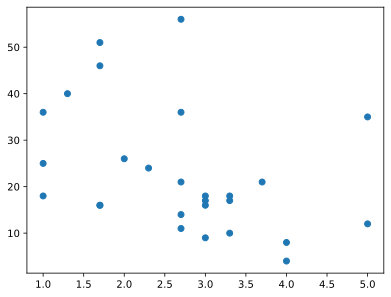

In [143]:
import numpy as np
from sklearn import preprocessing
from sklearn import utils
from sklearn import datasets, linear_model, neighbors
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split

X = np.array([ 36 ,25 ,18 ,40 ,51 ,46 ,16 ,16 ,26 ,24 ,56 ,36 ,21 ,14 ,11 ,18 ,17 ,16 ,9 ,18 ,17 ,10 ,21 ,8 ,4 ,35 ,12 ]).reshape(-1,1)
y = np.array([ 1 ,1 ,1 ,1.3 ,1.7 ,1.7 ,1.7 ,1.7 ,2 ,2.3 ,2.7 ,2.7 ,2.7 ,2.7 ,2.7 ,3 ,3 ,3 ,3 ,3.3 ,3.3 ,3.3 ,3.7 ,4 ,4 ,5 ,5 ]).reshape(-1,1)

plt.scatter(y,X)


In [144]:
print(X.shape)
print(y.shape)

(27, 1)
(27, 1)


Score: 0.04698353398098243


/nix/store/y3ib9k4gq3nam9yzfpwn2g1ffhm54w81-python3.10-scikit-learn-1.2.1/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


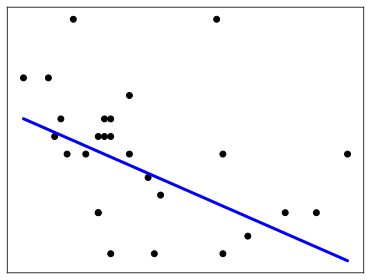

In [158]:
# Train the model using the training sets
# Create linear regression object
regr = linear_model.SGDRegressor(loss='epsilon_insensitive', warm_start=True, tol=None)
regr.fit(X, y)
print(f"Score: {regr.score(X,y)}")

# Make predictions using the testing set
y_pred = regr.predict(X)



# Plot outputs
plt.scatter(X, y, color="black")
plt.plot(X, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Score: 0.037037037037037035


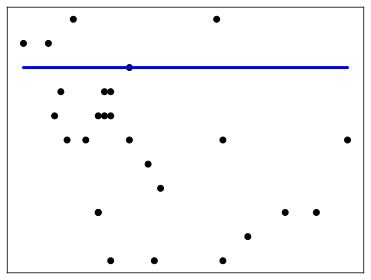

In [178]:
# Train the model using the training sets
# Create linear regression object

lab_enc = preprocessing.LabelEncoder()
y = lab_enc.fit_transform(y)

regr = linear_model.SGDClassifier()
regr.fit(X, y.ravel())
print(f"Score: {regr.score(X,y)}")

# Make predictions using the testing set
y_pred = regr.predict(X)



# Plot outputs
plt.scatter(X, y, color="black")
plt.plot(X, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Comments Analysis

In [ ]:
from collections import defaultdict
from datetime import datetime


dd = defaultdict(list)

def get_comments(org):
    comments = []
    repos = gh.get_organization(org).get_repos()
    for repo in repos:
        if repo.name != 'python':
            print(repo.name)
            for commit in repo.get_commits(): 
                comments.append({
                       'sha': commit.sha,
                       'last_modified': commit.last_modified,
                       'comments': [str(comment.created_at) for comment in commit.get_comments()],
                       })
    
    with open('comments.json', 'w') as outfile:
        outfile.write(str(comments))
    
    return comments  

In [26]:
import ast
import json
import pandas as pd
from datetime import datetime

#comments = get_comments('DB-Teaching')

with open('comments.json', 'r') as file:
    comments=file.read()

dc = pd.DataFrame(comments)


dc['sha'] = dc['sha'].astype(str)
dc['last_modified'] = pd.to_datetime(dc['last_modified'], format="%a, %d %b %Y %H:%M:%S GMT")


dc = dc.explode('comments').dropna()

dc['comments'] = pd.to_datetime(dc['comments'])
dc['delta'] = dc['comments'] -  dc['last_modified']
dc['delta'] = dc['delta'].dt.total_seconds() / 60

dc

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /var/folders/7y/km239y1n2w718p09d_ljlxhm0000gn/T/ipykernel_50891/1122746427.py:11 in <cell line: │
│ 11>                                                                                              │
│                                                                                                  │
│ [Errno 2] No such file or directory:                                                             │
│ '/var/folders/7y/km239y1n2w718p09d_ljlxhm0000gn/T/ipykernel_50891/1122746427.py'                 │
│                                                                                                  │
│ /nix/store/qa466by2f4nr0l3fb575zb33mcr245fd-python3.10-pandas-1.4.4/lib/python3.10/site-packages │
│ /pandas/core/frame.py:756 in __init__                                                            │
│                                                                                                  │
│     753 │   │   # For data is scalar                                                             │
│     754 │   │   else:                                                                            │
│     755 │   │   │   if index is None or columns is None:                                         │
│ ❱   756 │   │   │   │   raise ValueError("DataFrame constructor not properly called!")           │
│     757 │   │   │                                                                                │
│     758 │   │   │   # Argument 1 to "ensure_index" has incompatible type "Collection[Any]";      │
│     759 │   │   │   # expected "Union[Union[Union[ExtensionArray, ndarray],                      │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
ValueError: DataFrame constructor not properly called!

In [23]:
q_low = dc["delta"].quantile(0.4)
q_hi  = dc["delta"].quantile(0.9)

df_filtered = dc[(dc["delta"] < q_hi) & (dc["delta"] > q_low)]

df_filtered['delta'].describe()

count     391.000000
mean      264.280648
std       313.877128
min         1.983333
25%        23.108333
50%       112.550000
75%       467.500000
max      1186.700000
Name: delta, dtype: float64

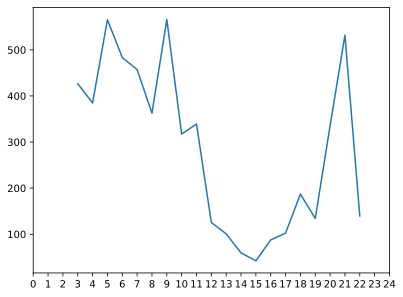

In [24]:
#df_filtered['delta'].groupby(df_filtered.comments.dt.hour).mean()
plt.plot(df_filtered['delta'].groupby(df_filtered.comments.dt.hour).mean())
plt.xticks(range(25))

for x, y in df_filtered['comments'].items():
    label = f"{y:2f}"
    plt.annotate(label, # this is the text
        (x, y), # this is the point to label
        textcoords="offset points", # how to position the text
        xytext=(0,10), # distance from text to points (x,y)
        ha='center') # horizontal alignment can be left, right or cent

plt.show()